In [63]:
#Import all the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
import math
import urllib
import difflib 
import seaborn as sns
import sklearn.model_selection

In [64]:
df_All_Companies_merged = pd. read_pickle(r'Data\df_All_Companies_merged.pkl')

In [65]:
X = pd.DataFrame(df_All_Companies_merged).to_numpy()

In [66]:
label = X[:,-1]

In [67]:
n, d = X.shape
print(n)

11189


In [68]:
Data = np.zeros((n,28))

## First column of Data matrix: Number of founders

In [78]:
for i in range(n):
    string = X[i,11]
    if type(string) == float:
        Data[i,0] = 1 # If the gender is not specified, guess it to be 1
    else:
        strlist = string.split(',')
        Data[i,0] = len(strlist)

## Second column of Data matrix: City score

In [79]:
for i in range(n):
    if X[i,3] not in CityDict:
        Data[i,1] = 0
    else:
        Data[i,1] = CityDict[X[i,3]]

## 3rd - 6th column of Data matrix: category list

In [80]:
for i in range(n):
    alist = []
    categoryList = X[i,4]

    if type(categoryList) == float:
        alist = [0]
    else:
        categoryList = categoryList.split(',')
        for item in categoryList:
            if item not in CatagoryListDict:
                alist.append(0.1)
            else:
                alist.append(CatagoryListDict[item])
    Len = len(alist)
    total = sum(alist)
    MAX = max(alist)
    MIN = min(alist)
    AV = total/Len
    Data[i,2] = total
    Data[i,3] = MAX
    Data[i,4] = MIN
    Data[i,5] = AV   

## 7th - 10th column of Data matrix: category groups list

In [81]:
for i in range(n):
    alist = []
    categoryGroupList = X[i,5]

    if type(categoryGroupList) == float:
        alist = [0]
    else:
        categoryGroupList = categoryGroupList.split(',')
        for item in categoryGroupList:
            if item not in CatagoryGroupsListDict:
                alist.append(0.1)
            else:
                alist.append(CatagoryGroupsListDict[item])
    Len = len(alist)
    total = sum(alist)
    MAX = max(alist)
    MIN = min(alist)
    AV = total/Len
    Data[i,6] = total
    Data[i,7] = MAX
    Data[i,8] = MIN
    Data[i,9] = AV   

## 11th - 14th column of Data matrix: all seed investors

In [82]:
for i in range(n):
    alist = []
    categoryList = X[i,7]

    if type(categoryList) == float:
        alist = [0]
    else:
        categoryList = categoryList.split(',')
        for item in categoryList:
            if item not in All_seed_investors_Dict:
                alist.append(0.1)
            else:
                alist.append(All_seed_investors_Dict[item])
    Len = len(alist)
    total = sum(alist)
    MAX = max(alist)
    MIN = min(alist)
    AV = total/Len
    Data[i,10] = total
    Data[i,11] = MAX
    Data[i,12] = MIN
    Data[i,13] = AV   

## 15th - 18th column of Data matrix: university scores of founders

In [83]:
for i in range(n):
    alist = []
    categoryList = X[i,8]

    if type(categoryList) == float:
        alist = [0]
    else:
        categoryList = categoryList.split(',')
        for item in categoryList:
            if item not in University_of_foundersDict:
                alist.append(0.1)
            else:
                alist.append(University_of_foundersDict[item])
    Len = len(alist)
    total = sum(alist)
    MAX = max(alist)
    MIN = min(alist)
    AV = total/Len
    Data[i,14] = total
    Data[i,15] = MAX
    Data[i,16] = MIN
    Data[i,17] = AV   
    
    

## 19th -- 22nd column of Data matrix: degree scores of founders

In [84]:
for i in range(n):
    alist = []
    categoryList = X[i,9]

    if type(categoryList) == float:
        alist = [0]
    else:
        categoryList = categoryList.split(',')
        #print(categoryList)
        for item in categoryList:
            if item == '':
                categoryList.remove(item)
        for item in categoryList:
            letter = item[0]
            if letter not in Degree_of_founders_Dict:
                alist.append(0.1)
            else:
                alist.append(Degree_of_founders_Dict[letter])
           
    Len = len(alist)
    total = sum(alist)
    MAX = max(alist)
    MIN = min(alist)
    AV = total/Len
    Data[i,18] = total
    Data[i,19] = MAX
    Data[i,20] = MIN
    Data[i,21] = AV   

## 23rd - 26th column of Data matrix: Subject score of founders

In [85]:
for i in range(n):
    alist = []
    categoryList = X[i,10]

    if type(categoryList) == float:
        alist = [0]
    elif type(categoryList) == int:
        alist = [0]
    else:
        categoryList = categoryList.split(',')
        for item in categoryList:
            if item not in Subject_degrees_of_founders_Dict:
                alist.append(0.1)
            else:
                alist.append(Subject_degrees_of_founders_Dict[item])
    Len = len(alist)
    total = sum(alist)
    MAX = max(alist)
    MIN = min(alist)
    AV = total/Len
    Data[i,22] = total
    Data[i,23] = MAX
    Data[i,24] = MIN
    Data[i,25] = AV   

## 27th column of Data matrix: previous companies of founders 

In [86]:
for i in range(n):
    total = 0
    categoryList = X[i,13]

    if type(categoryList) == float:
        total = 0
    else:
        categoryList = categoryList.split(',')
        for item in categoryList:
            if item in Prev_companies_of_founders_list:
                total +=1
   
    Data[i,26] = total
   
    

## 28th column of Data matrix: previous title of founders

In [87]:
for i in range(n):
    total = 0
    categoryList = X[i,14]

    if type(categoryList) == float:
        total = 0
    else:
        categoryList = categoryList.split(',')
        for item in categoryList:
            if item in Prev_title_of_founders_list:
                total +=1
   
    Data[i,27] = total
   

## Replace all missing data by the mean of that column

In [88]:
for j in range(2,26):
    avg = np.mean(Data[:,j])
    for i in range(n):
        if Data[i,j] == 0:
            Data[i,j] = avg

# Data Visualisation

In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas

## PCA

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(Data)

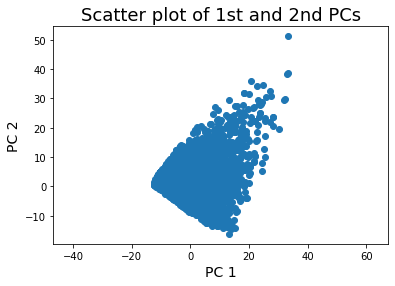

In [92]:
plt.scatter(z[:,0],z[:,1])
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

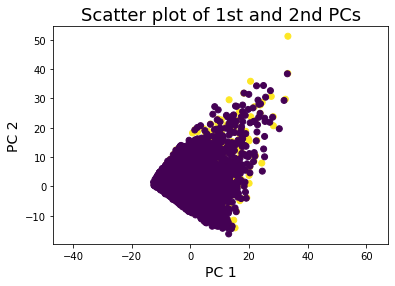

In [93]:
plt.scatter(z[:,0],z[:,1],c=label)
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

## MDS

In [68]:
from sklearn.manifold import MDS

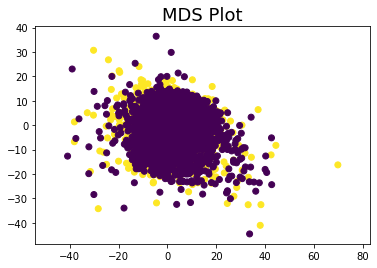

In [69]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(Data)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=label)
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

## T-SNE

In [94]:
from sklearn.manifold import TSNE

/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 11189 samples in 0.000s...
[t-SNE] Computed neighbors for 11189 samples in 3.469s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11189
[t-SNE] Computed conditional probabilities for sample 2000 / 11189
[t-SNE] Computed conditional probabilities for sample 3000 / 11189
[t-SNE] Computed conditional probabilities for sample 4000 / 11189
[t-SNE] Computed conditional probabilities for sample 5000 / 11189
[t-SNE] Computed conditional probabilities for sample 6000 / 11189
[t-SNE] Computed conditional probabilities for sample 7000 / 11189
[t-SNE] Computed conditional probabilities for sample 8000 / 11189
[t-SNE] Computed conditional probabilities for sample 9000 / 11189
[t-SNE] Computed conditional probabilities for sample 10000 / 11189
[t-SNE] Computed conditional probabilities for sample 11000 / 11189
[t-SNE] Computed conditional probabilities for sample 11189 / 11189
[t-SNE] Mean sigma: 2.449912
[t-SNE] KL divergenc

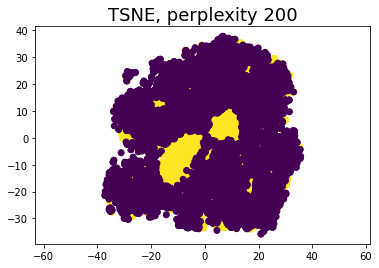

In [96]:
tsne = TSNE(n_components=2,verbose=1,perplexity=200) # Higher perplexity means that you are trying to match larger neighbourhoods
z_tsne = tsne.fit_transform(Data)
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=label)
plt.title("TSNE, perplexity 200",size=18)
plt.axis("equal")
plt.show()

In [97]:
label=label.astype('int')

# RBF Kernelised SVM

/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


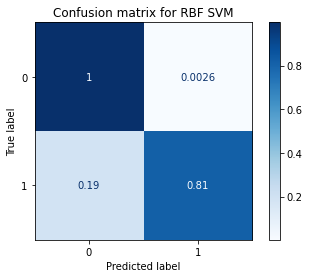

Model accuracy: 0.9480097481722177


In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions



# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(Data, label, test_size=0.33, random_state=42)

# Create the SVM
svm = SVC(random_state=None, kernel='rbf', gamma=0.008, C=10)

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for RBF SVM')
plt.show(matrix)
plt.show()

# Generate predictions
y_pred = svm.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Plot decision boundary
#plot_decision_regions(X_test, y_test, clf=svm, legend=2)
#plt.show()

# Logistic Regression

0.9507175737882481


/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


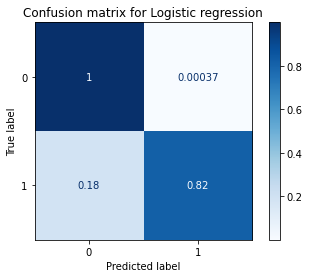

In [99]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
log_reg = LogisticRegressionCV(cv=5,Cs=[0.001,0.01,0.005,0.1,0.5,1,5,10],max_iter=10000,penalty="l1",solver="liblinear",multi_class="auto")
log_reg.fit(X_train,y_train)
print(log_reg.score(X_test,y_test))

matrix = plot_confusion_matrix(log_reg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Logistic regression')
plt.show(matrix)
plt.show()

In [120]:
coef = log_reg.coef_

In [124]:
coef

array([ 6.96232059e-02,  1.29498017e-01,  4.26106732e-02,  5.03138220e-03,
        7.61707294e-03, -2.06573236e-01, -3.32441453e-02,  7.15993769e-02,
       -6.25150657e-02,  7.76541550e-02, -5.60161823e-01,  1.69026847e+00,
        1.18004411e+00,  3.75041372e+00,  2.19917423e-03,  1.52462530e-01,
        7.75255052e-02, -2.22021557e-01, -5.74143160e-02,  1.94470018e-01,
        3.30099813e-01, -4.38188331e-01, -3.85892576e-04, -4.19493057e-02,
       -1.27815928e-01,  1.61252374e-01,  1.14720846e-01,  2.69426540e-02])

## remove all seed investor attribute

In [158]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.001,0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train[:,np.array([0,1,2,3,4,5,6,7,8,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27])],y_train)
log_reg.score(X_test[:,np.array([0,1,2,3,4,5,6,7,8,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27])],y_test)

0.7338207419442188

Evsluate the importance of features

In [154]:
I_number_of_founders = abs(coef[0][0])
I_city = abs(coef[0][1])
I_category_list = abs( coef[0][2] +  coef[0][3] +  coef[0][4] +  coef[0][5])/4
I_category_groups_list = abs( coef[0][6] +  coef[0][7] +  coef[0][8] +  coef[0][9])/4
I_all_seed_investors = abs( coef[0][10] +  coef[0][11] +  coef[0][12] +  coef[0][13])/4
I_university__of_founders = abs( coef[0][14] +  coef[0][15] + coef[0][16] +  coef[0][17])/4
I_degrees_of_founders = abs( coef[0][18] +  coef[0][19] +  coef[0][20] +  coef[0][21])/4
I_subject_of_founders = abs( coef[0][22] +  coef[0][23] +  coef[0][24] +  coef[0][25])/4
I_previous_companies_of_founders =  abs(coef[0][26])
I_previous_titles_of_founders =  abs(coef[0][27])

In [155]:
print(I_number_of_founders,I_city,I_category_list,I_category_groups_list,I_all_seed_investors,I_university__of_founders,
     I_degrees_of_founders,I_subject_of_founders,I_previous_companies_of_founders,I_previous_titles_of_founders)


0.06962320593728005 0.12949801724348056 0.037828526923902185 0.013373580224100606 1.515141118066742 0.0025414131316684463 0.007241795976965365 0.0022246880106596145 0.11472084611894277 0.02694265401809331


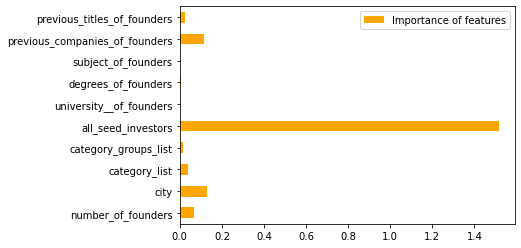

In [156]:
Importance = [I_number_of_founders,I_city,I_category_list,I_category_groups_list,I_all_seed_investors,I_university__of_founders,
     I_degrees_of_founders,I_subject_of_founders,I_previous_companies_of_founders,I_previous_titles_of_founders]
#lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['number_of_founders', 'city', 'category_list',
    'category_groups_list','all_seed_investors',
    'university__of_founders','degrees_of_founders',
     'subject_of_founders','previous_companies_of_founders',
    'previous_titles_of_founders']
df = pd.DataFrame({'Importance of features': Importance}, index=index)
ax = df.plot.barh(y='Importance of features',color='orange')

# Random Forest

Model accuracy: 0.9618196588139724


/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


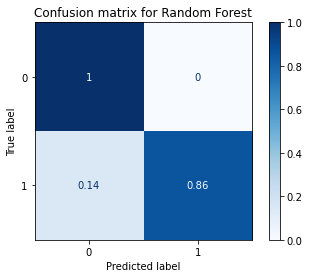

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
# Generate predictions
y_pred = rf.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

matrix = plot_confusion_matrix(rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Random Forest')
plt.show(matrix)
plt.show()

# Gradient Boosting

0.991876523151909


/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


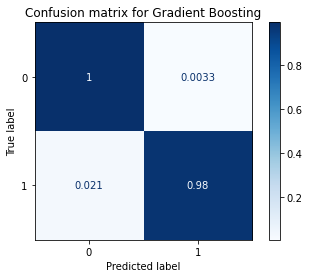

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
print(gb.score(X_test, y_test))

matrix = plot_confusion_matrix(gb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Gradient Boosting')
plt.show(matrix)
plt.show()

# Deep Neural Network 

0.9894394800974817


/Users/henrywong/opt/miniconda3/envs/6.86x/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


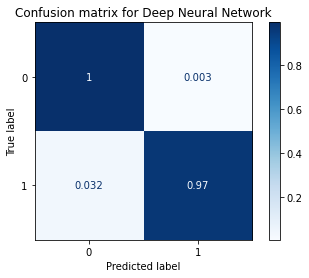

In [107]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100,100,100,50,20,10), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
              learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, 
              random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
              early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
              n_iter_no_change=10, max_fun=15000).fit(X_train, y_train)
print(nn.score(X_test, y_test))

matrix = plot_confusion_matrix(nn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Deep Neural Network')
plt.show(matrix)
plt.show()


# City dictionary

In [69]:
CityDict = {'San Francisco':5,'New York':4, 'Los Angeles':3,'Palo Alto':3,'Boston':3,
            'Mountain View':3,'Brooklyn':3,'San Mateo':3, 'Seattle':3, 'Cambridge':2, 
            'Austin':2, 'Redwood City':2, 'Santa Monica':2,'Oakland':1, 'Chicago':1, 'San Jose':1, 
            'Menlo Park':1, 'Washington':1, 'Santa Clara':1, 'Berkeley':1}


# Category list dictionary

In [70]:
CatagoryListDict = {'Software':5, 'Information Technology':3, 'Health Care':3, 'E-Commerce':3, 'Internet':3,
                    'SaaS':3, 'FinTech':3, 'Mobile':3, 'Artificial Intelligence':2, 'Financial Services':2,
                    'Enterprise Software':2, 'Analytics':2, 'Apps':2, 'Machine Learning':2, 'Finance':2, 
                    'Big Data':1, 'Education':1, 'Marketplace':1, 'Mobile Apps':1, 'Biotechnology':1,
                    'Real Estate':1, 'Wellness':1, 'Social Media':1, 'Medical':1, 'Retail':1, 
                    'Blockchain':0.5, 'Payments':0.5, 'Human Resources':0.5, 'Security':0.5, 'Cryptocurrency':0.5,
                   'Cloud Computing':0.5, 'Fashion':0.5, 'Food and Beverage':0.5, 'Computer':0.5, 'Advertising':0.5,
                   'Logistics':0.5, 'Robotics':0.5, 'Cyber Security':0.5, 'Developer Tools':0.5, 'Developer APIs':0.5}

# Category groups list dictionary

In [71]:
CatagoryGroupsListDict = {'Software':5, 'Information Technology':3, 'Internet Services':3, 'Data and Analytics':3, 
                          'Financial Services':3,
                    'Commerce and Shopping':3, 'Health Care':3, 'Science and Engineering':3, 
                          'Mobile':2, 'Hardware':2,
                    'Media and Entertainment':2, 'Artificial Intelligence':2, 'Apps':2, 'Sales and Marketing':2, 
                          'Professional Services':2, 
                    'Community and Lifestyle':1, 'Transportation':1, 'Real Estate':1, 'Payments':1, 'Design':1,
                         'Consumer Electronics':1, 'Privacy and Security':1, 'Administrative Services':1, 
                          'Consumer Goods':1, 'Food and Beverage':1,
                    'Content and Publishing':1, 'Biotechnology':1, 'Sports':1, 
                          'Video':1, 'Messaging and Telecommunications':1,'Travel and Tourism':1,'Advertising':1}

# All_seed_investors_Dict

In [72]:
All_seed_investors_Dict = {'SV Angel':5, 'BoxGroup':3, 'Great Oaks Venture Capital':3, 'Soma Capital':3, 
                          'Initialized Capital':3,
                    'DCVC':3, 'Tuesday Capital':3, 'Ulu Ventures':3, 
                          'RRE Ventures':2, 'Wei Guo':2,
                    'Accel':2, 'Acequia Capital (AceCap)':2, 'Abstract Ventures':2, 'Accomplice':2, 
                          'Susa Ventures':2, 
                    'Scott Belsky':1, 'Pear VC':1, 'Haystack':1, 'NextView Ventures':1, 'UpHonest Capital':1,
                         'Kevin Moore':1, 'Digital Currency Group':1, 'Amino Capital':1, 
                          'Harrison Metal':1, 'Canaan Partners':1,
                    'Rothenberg Ventures':1, 'Graph Ventures':1, 'Kevin Mahaffey':1, 
                          'Expansion Venture Capital':1, 'Lee Linden':1,
                         'ACE & Company':1, 'Tim Draper':1,
                    'Atlas Venture':1, 'Spark Capital':1, 'Social Leverage':1}

# University of founders

In [73]:
University_of_foundersDict = {'Stanford University':5, 'Massachusetts Institute of Technology':3, 
                          'University of California Berkeley':3, 'University of California':3, 
                          'Harvard University':3,
                    'Harvard Business School':3, 'Carnegie Mellon University':3, 'University of Pennsylvania':3, 
                          'Cornell University':2, 'Wharton School of the University of Pennsylvania':2,
                    'Stanford Graduate School of Business':2, 'University of Southern California':2, 
                          ' Los Angeles':2, 'Yale University':2, 
                          'Columbia University':2, 
                    'Duke University':1, 'Princeton University':1, 'University of Michigan':1, 
                          'The University of Texas at Austin':1, 'New York University':1,
                         'Northwestern University':1,'University of Washington':1,
                          'Brown University':1,'University of Illinois Urbana-Champaign':1,
                          'University of Virginia':1,'Georgia Institute of Technology':1,
                          'Dartmouth College':2,'MIT - Sloan School of Management':4,
                          'University of Wisconsin - Madison':1,'Columbia Business School':3,
                          'Georgetown University':1,'University of Waterloo':1,'University of Cambridge':2,
                         'Tel Aviv University':1,'University of Oxford':2}

# Degree of founders

In [74]:
Degree_of_founders_Dict = {'P':5,'M':3,'B':2,'J':5,'G':3}

# Subject_degrees_of_founders

In [75]:
Subject_degrees_of_founders_Dict = {'Computer Science':5, 'Economics':3, 
                          'Electrical Engineering':3, 'Finance':3, 
                          'Mechanical Engineering':3,
                    'Computer Engineering':3, 'Business Administration':3, 'Business':3, 
                          'Physics':2, 'Mathematics':3,
                    'Entrepreneurship':2, ' Economics':2, 
                          'Political Science':2, 'Electrical Engineering and Computer Science':3, 
                          'Engineering':2, 
                    ' Computer Science':5, 'Marketing':1, 'Philosophy':1, 
                          'Law':1, 'Electrical Engineering & Computer Science':1,
                          'Psychology':1, 'Management':1,
                    'History':2, 'Biology':2, ' Mathematics':3,
                                    'Electrical and Computer Engineering':3, 'Software Engineering':5, 
                          'Information Systems':3, 'International Relations':1,
                          'Biomedical Engineering':1, ' Finance':3,
                                    ' Entrepreneurship':1, 'Neuroscience':1,
                          'Computer Science and Engineering':5, 'Chemistry':1,
                    'Bioengineering':1, 'Aerospace Engineering':1, 'Sociology':1,
                                    'Information Technology':3}

# Prev_title_of_founders

In [76]:
Prev_title_of_founders_list = ['Co-Founder', 'Founder' 'Advisor', 'Founder & CEO', 'Co-Founder & CEO', 'Board Member',
                               'Co-founder', 'CEO', 'Co-Founder and CEO', 'Co-Founder & CTO', 'Team Member',
                               'Founder and CEO', 'Investor', 'Software Engineer', ' CEO',
                              'Director','CTO','CEO & Co-Founder','Co-founder & CEO']

# prev_companies_of_founders

In [77]:
Prev_companies_of_founders_list = ['Google', 'Microsoft' 'Meta', 'Yahoo', 'Apple', 'Twitter',
                               'Stanford University', 'Goldman Sachs', 'Cisco', 'IBM', 'Techstars',
                               'McKinsey & Company', 'Amazon','Groupon',' Inc.','Cobalt',
                                   '500 Startups','Zynga','Salesforce','Accenture','Y Combinator','PayPal',
                                   'Massachusetts Institute of Technology','Embark','Pioneer Fund',
                                  'LinkedIn','Intel','Deloitte','Palantir','Morgan Stanley','Oracle','Dropbox','Uber','Etsy']